# 1. Spielzeugdatensatz
Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungsseite
auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für
MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den
Spielzeugdaten aus der Vorlesung trainieren.

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def create_data(num_data_points, x1_min, x1_max, x2_min, x2_max):
    # Generiere zufällige Datenpunkte
    x1_values = np.random.uniform(x1_min, x1_max, num_data_points)
    x2_values = np.random.uniform(x2_min, x2_max, num_data_points)

    # Erstelle eine Designmatrix
    X = np.column_stack((x1_values, x2_values))

    # Initialisiere ein leeres Array für die Klassenlabels
    y = np.zeros(num_data_points, dtype=int)

    # Weise den Datenpunkten Klassenlabels zu basierend auf den Quadranten
    for i in range(num_data_points):
        if X[i][0] > 0 and X[i][1] > 0:
            y[i] = 1
        elif X[i][0] < 0 and X[i][1] > 0:
            y[i] = 0
        elif X[i][0] < 0 and X[i][1] < 0:
            y[i] = 1
        elif X[i][0] > 0 and X[i][1] < 0:
            y[i] = 0
        else:
            raise Exception("Error: Data point not in any quadrant")

    return X, y

X_train, y_train = create_data(200, -6, 6, -6, 6)
X_test, y_test = create_data(200, -6, 6, -6, 6)

3. Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

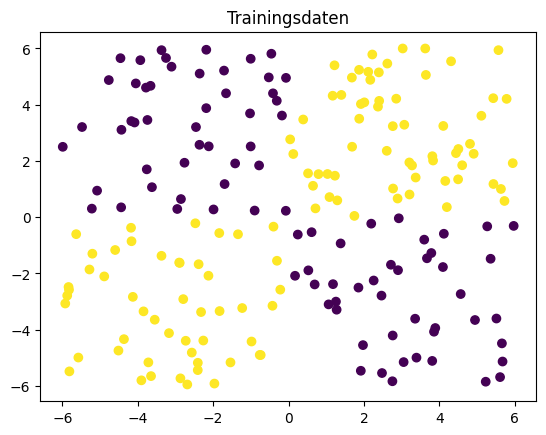

In [35]:
plt.title("Trainingsdaten")
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)

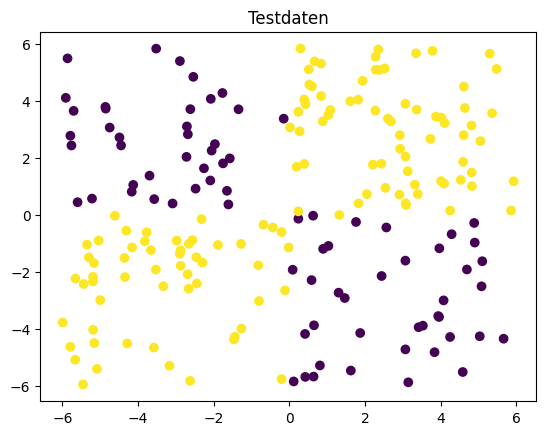

In [36]:
plt.title("Testdaten")
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)

4. Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [37]:
# Zwei eindimensionale Eingangswerte: Der Gewichtsvektor hat die Form (2, 1).
w1 = np.array([1,0])
w2 = np.array([0,1])
print(np.array([w1, w2]))

[[1 0]
 [0 1]]


In [38]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

5. Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

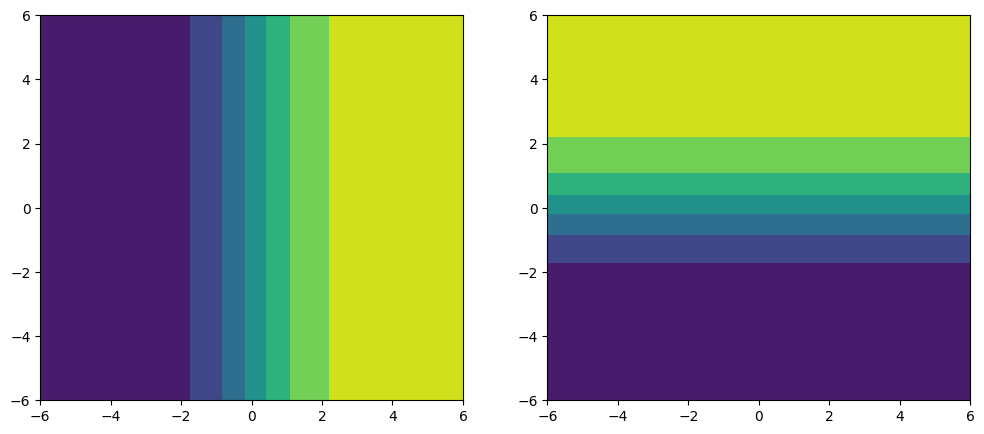

In [39]:
# Gitter erstellen
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Neuron 1: teilt die Inputebene waagrecht entlang der x-Achse
z_xx1 = x_grid
neuron1 = sigmoid(z_xx1)

# Neuron 2: teilt die Inputebene senkrecht entlang der y-Achse
z_xx2 = y_grid
neuron2 = sigmoid(z_xx2)

# Darstellung der Ergebnisse als Farbbilder
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, neuron1)

plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, neuron2)

plt.show()

6. Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings und
Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entsprechende
Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [40]:
def calculate_neuron_output(weights, inputs):
    return sigmoid(np.dot(inputs, weights.T))

# Calculate the design matrix for the training data
train_design_matrix = np.column_stack((calculate_neuron_output(w1, X_train), calculate_neuron_output(w2, X_train)))
print('Size of Train Data Layer 1: ', train_design_matrix.shape)

# Calculate the design matrix for the test data
test_design_matrix = np.column_stack((calculate_neuron_output(w1, X_test), calculate_neuron_output(w2, X_test)))
print('Size of Test Data Layer 1: ', test_design_matrix.shape)

# Calculate the grid design matrix
step = 12 / 100
x_range = np.arange(-6, 6, step)
y_range = np.arange(-6, 6, step)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_inputs = np.column_stack((x_grid.ravel(), y_grid.ravel()))
grid_design_matrix = np.column_stack((calculate_neuron_output(w1, grid_inputs), calculate_neuron_output(w2, grid_inputs)))
grid_design_matrix = grid_design_matrix.T  # Transpose to match your desired shape
print('Size of Grid Matrix: ', grid_design_matrix.shape)

Size of Train Data Layer 1:  (200, 2)
Size of Test Data Layer 1:  (200, 2)
Size of Grid Matrix:  (2, 10000)


In [41]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                    # Lernrate
no_hidden = 36               # Anzahl versteckter Neuronen
epochs = 150                  # Anzahl Epochen
sizes = [2, 2, 1] 
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
print(weights[1].shape)

(1, 2)


In [42]:
def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

In [43]:
def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    
    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = sigmoid_prime(z) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

In [44]:
def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        
        # Addiere einzelne Updates auf
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw
                    for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb
                   for b, nb in zip(biases, nabla_b)]
    
    return (weights, biases)

In [45]:
def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele

    mse_sum = 0 # Summe der quadratischen Fehler
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        
        if y == 0:
            if ypred[0] < 0.5:
                correct += 1
        elif y == 1:
            if ypred[0] >= 0.5:
                correct += 1

        # Entscheidung des Netzwerks basierend auf dem Output
        

        # Überprüfe, ob die Klassifikation korrekt ist

        # MSE-Berechnung
        mse_sum += (y - ypred[0]) ** 2

    # Berechne den durchschnittlichen MSE
    mse = mse_sum / x2.shape[0]

    return correct, mse

In [46]:
def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse = np.zeros(epochs)
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]

        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)
        

        acc_val[j], mse[j] = evaluate(x2, y2)
        print("Epoch {0}: {1} / {2} -- {3}".format(j, acc_val[j], n_test, mse[j]))
    
    return acc_val, mse



In [47]:
# Darstellung
def ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    # Lernkurve der Genauigkeit darstellen
    plt.plot(acc_val / test_design_matrix.shape[0])
    plt.title("Genauigkeit")

    plt.subplot(1, 3, 2)
    # Lernkurve des MSE darstellen
    plt.plot(mse / test_design_matrix.shape[0])
    plt.title("MSE")

    plt.show()

    # Get predictions for each point in the meshgrid
    predictions = feedforward(grid_design_matrix)

    # Reshape predictions to match the shape of the meshgrid
    predictions = predictions.reshape(100,100)

    plt.figure(figsize=(30, 5))
    plt.subplot(1, 3, 3)
    # Plot the decision boundary using imshow
    plt.imshow(predictions, extent=(-6, 6, -6, 6), origin='lower', cmap='viridis')

    # Add scatter plot of training data points if available
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')

    plt.title('Neural Network Decision Boundaries')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar(label='Activation')
    plt.show()

Epoch 0: 76.0 / 200 -- 0.5497761153992486
Epoch 1: 76.0 / 200 -- 0.5481713968461258
Epoch 2: 76.0 / 200 -- 0.546505511255925
Epoch 3: 76.0 / 200 -- 0.5447748204052517
Epoch 4: 76.0 / 200 -- 0.5429767986971212


Epoch 5: 76.0 / 200 -- 0.541107586325422
Epoch 6: 76.0 / 200 -- 0.5391634182798088
Epoch 7: 76.0 / 200 -- 0.5371412716825532
Epoch 8: 76.0 / 200 -- 0.5350362859252187
Epoch 9: 76.0 / 200 -- 0.532845376092889
Epoch 10: 76.0 / 200 -- 0.5305631731907045
Epoch 11: 76.0 / 200 -- 0.5281852288788617
Epoch 12: 76.0 / 200 -- 0.5257073105555907


C:\Users\gaise\AppData\Local\Temp\ipykernel_5080\1046353564.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  acc_val[j], mse[j] = evaluate(x2, y2)


Epoch 13: 76.0 / 200 -- 0.523123020132083
Epoch 14: 76.0 / 200 -- 0.5204278414826125
Epoch 15: 76.0 / 200 -- 0.5176172772297584
Epoch 16: 76.0 / 200 -- 0.5146838290140759
Epoch 17: 76.0 / 200 -- 0.5116224845822537
Epoch 18: 76.0 / 200 -- 0.5084274859820593
Epoch 19: 76.0 / 200 -- 0.5050931935331335
Epoch 20: 76.0 / 200 -- 0.5016137283338475
Epoch 21: 76.0 / 200 -- 0.49798143532837075
Epoch 22: 76.0 / 200 -- 0.49418966433727995
Epoch 23: 76.0 / 200 -- 0.4902325889562163
Epoch 24: 76.0 / 200 -- 0.4861045680502229
Epoch 25: 76.0 / 200 -- 0.48180133302165573
Epoch 26: 76.0 / 200 -- 0.47731577191406677
Epoch 27: 76.0 / 200 -- 0.4726443972967222
Epoch 28: 76.0 / 200 -- 0.4677834614679874
Epoch 29: 76.0 / 200 -- 0.4627257009246819
Epoch 30: 76.0 / 200 -- 0.45747825934846803
Epoch 31: 76.0 / 200 -- 0.4520326738263726
Epoch 32: 76.0 / 200 -- 0.44639743685175143
Epoch 33: 76.0 / 200 -- 0.44057067988080123
Epoch 34: 76.0 / 200 -- 0.43456244875399264
Epoch 35: 76.0 / 200 -- 0.42837705870093173
Epo

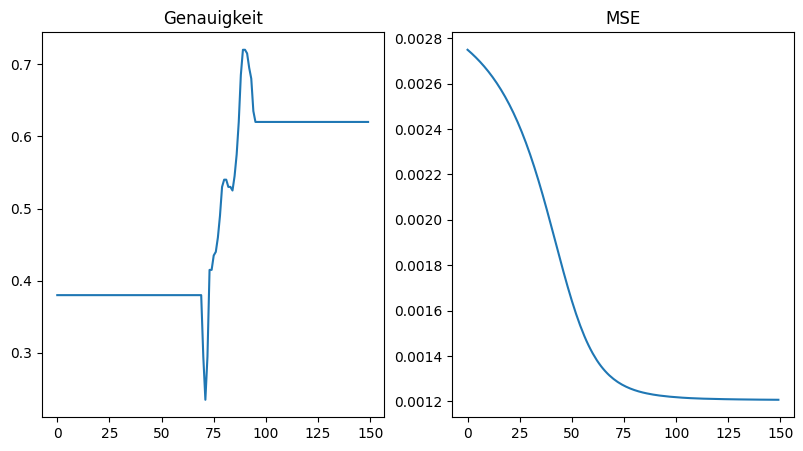

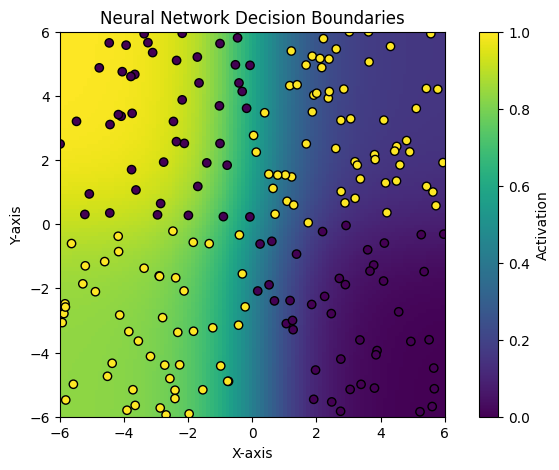

In [48]:
acc_val, mse = SGD(train_design_matrix, y_train, epochs, mbs, eta, test_design_matrix, y_test)
ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train)